In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
ksize = 50
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.5
phi = 0

In [4]:
kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

In [ ]:
plt.imshow(kernel)

TEST

In [ ]:
import cv2

cv2.namedWindow("preview")
cv2.resizeWindow('preview', 700, 512)

def track(x):
    return x

def track2(x):
    return x*np.pi/4

cv2.createTrackbar('Hue min', 'preview', 0, 179,track)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()

Cell to ajuste parameters

In [24]:
import cv2
import matplotlib.pyplot as plt

# Créer la fenêtre OpenCV
cv2.namedWindow("preview")
cv2.resizeWindow('preview', 700, 512)

# Fonction de rappel pour le slider
def track(x):
    return x

# def track2(x):
#     return x*np.pi/4

# Créer les sliders
cv2.createTrackbar('ksize', 'preview', 0, 600, track)
cv2.createTrackbar('sigma', 'preview', 0, 100, track)
cv2.createTrackbar('theta', 'preview', 0, 100, track)
cv2.createTrackbar('lamda', 'preview', 0, 300, track)
cv2.createTrackbar('gamma_div10', 'preview', 0, 10, track)
cv2.createTrackbar('phi_div10', 'preview', 0, 100, track)

gamma = 0.5
phi = 0

while True:
    # Obtenir les valeurs actuelles des sliders
    ksize = cv2.getTrackbarPos('ksize', 'preview')
    sigma = cv2.getTrackbarPos('sigma', 'preview')
    theta = (cv2.getTrackbarPos('theta', 'preview')/10)*np.pi/4
    lamda = (cv2.getTrackbarPos('lamda', 'preview')/10)*np.pi/4
    gamma = cv2.getTrackbarPos('gamma_div10', 'preview')/10
    phi = cv2.getTrackbarPos('phi_div10', 'preview')/10

    # Afficher l'image avec le noyau de Gabor
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    cv2.imshow('preview', kernel)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

# Fermer la fenêtre OpenCV
cv2.destroyAllWindows()


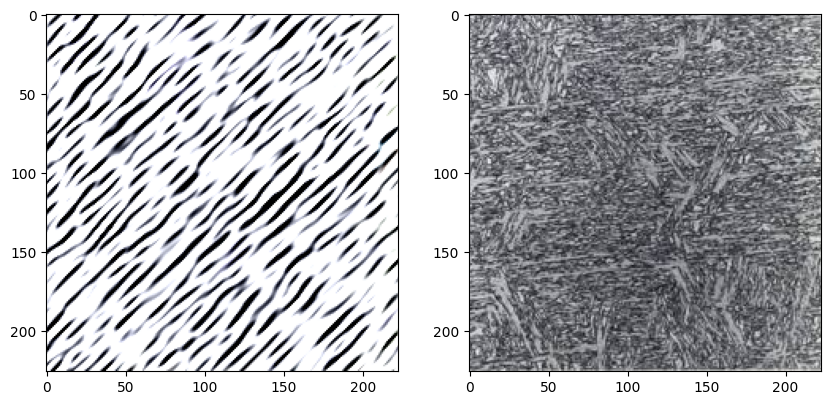

In [21]:
img = cv2.imread('martensite.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
f_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(f_img)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

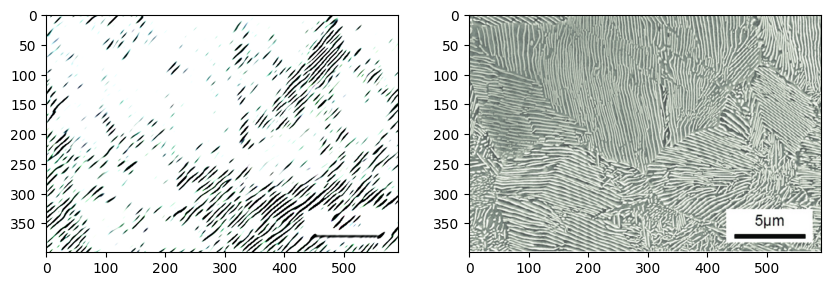

In [22]:
img = cv2.imread('pearlite.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
f_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(f_img)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

In [2]:
import pandas as pd
import cv2
df = pd.DataFrame()
img4 = cv2.imread('dif_structure.jpg')
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img4 = img4.reshape(-1)

df['progonal_pixel'] = img4


In [ ]:
import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('dif_structure.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
print(df.head())

df.to_csv("Gabor.csv")